<a href="https://colab.research.google.com/github/gabrielborja/python_data_analysis/blob/main/molding_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hanging pieces

##Uploading necessary packages

In [ ]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

%matplotlib inline

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (10, 4)})

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

Saving hanging_1_20-jan-2021.csv to hanging_1_20-jan-2021.csv


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['hanging_1_20-jan-2021.csv']), parse_dates=['Event'])

In [ ]:
#Checking stored dataframe
df.tail(2)

,Event,Heng
449,2021-01-20 12:01:16,1
450,2021-01-20 12:01:19,14


In [ ]:
#Checking the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Event   451 non-null    datetime64[ns]
 1   Heng    451 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.2 KB


In [ ]:
#Performing preliminary statistical analysis
df.describe()

,Heng
count,451.000000
mean,5.077605
std,4.417210
min,1.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,27.000000


## EDA Hanging pieces

In [ ]:
#Calculating the cumulative sum
df = df.assign(Cum_heng = lambda x: x['Heng'].cumsum())
df.tail(2)

,Event,Heng,Cum_heng
449,2021-01-20 12:01:16,1,2276
450,2021-01-20 12:01:19,14,2290


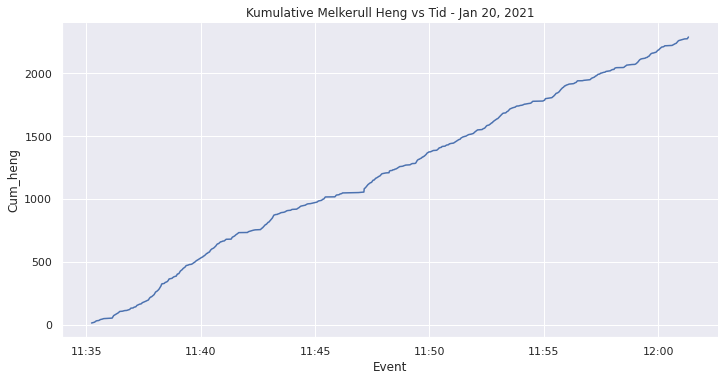

In [ ]:
#Plotting the cumulative count of hanging pieces vs. time
g1 = sns.relplot(data=df, x='Event', y='Cum_heng', kind='line', aspect = 2.0)
xformatter = mdates.DateFormatter("%H:%M")
g1.axes[0,0].xaxis.set_major_formatter(xformatter)
plt.title('Kumulative Melkerull Heng vs Tid - Jan 20, 2021')
plt.show()

In [ ]:
#Calculating the time delta for the test
df['Event'].iloc[450] - df['Event'].iloc[0]

Timedelta('0 days 00:26:05')

In [ ]:
#Number of hanging pieces in 1 hour
round(2290 * 60 / 26.08333, 2)

5267.73

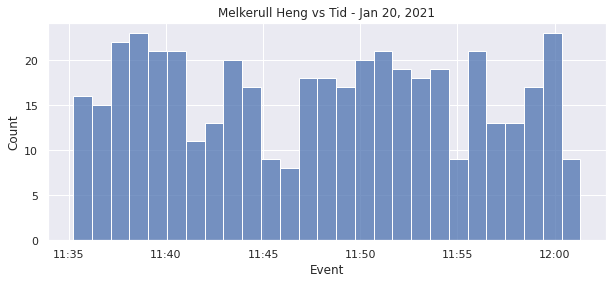

In [ ]:
#Plotting a histogram of the hanging pieces vs. time
g2 = sns.histplot(data=df['Event'], bins=27)
xformatter = mdates.DateFormatter("%H:%M")
g2.xaxis.set_major_formatter(xformatter)
plt.title('Melkerull Heng vs Tid - Jan 20, 2021')
plt.show()

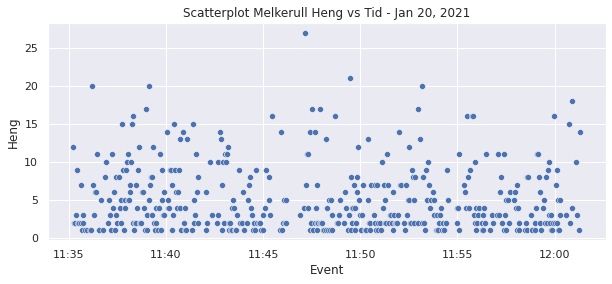

In [ ]:
#Scatterplot of the hanging pieces vs time
g3 = sns.scatterplot(data=df, x='Event', y='Heng')
xformatter = mdates.DateFormatter("%H:%M")
g3.xaxis.set_major_formatter(xformatter)
plt.title('Scatterplot Melkerull Heng vs Tid - Jan 20, 2021')
plt.show()

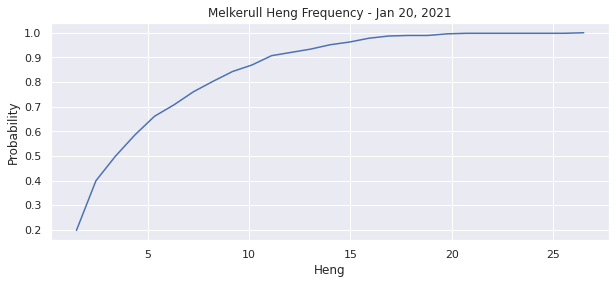

In [ ]:
#Plotting the probability of the hanging pieces per size
sns.histplot(data=df['Heng'], stat='probability', bins=27, cumulative=True, element="poly", fill=False, )
plt.title('Melkerull Heng Frequency - Jan 20, 2021')
plt.show()

In [ ]:
#Categorize Hanging pieces by size
def cat_size(heng):
  return ["small" if i <= 5 else "medium" if i <= 10 else "large" for i in heng]

df = df.assign(Category = cat_size(df['Heng']))
df.tail(10)

,Event,Heng,Cum_heng,Category
441,2021-01-20 12:00:17,5,2220,small
442,2021-01-20 12:00:36,3,2223,small
443,2021-01-20 12:00:45,15,2238,large
444,2021-01-20 12:00:47,2,2240,small
445,2021-01-20 12:00:52,18,2258,large
446,2021-01-20 12:00:54,4,2262,small
447,2021-01-20 12:01:06,10,2272,medium
448,2021-01-20 12:01:09,3,2275,small
449,2021-01-20 12:01:16,1,2276,small
450,2021-01-20 12:01:19,14,2290,large


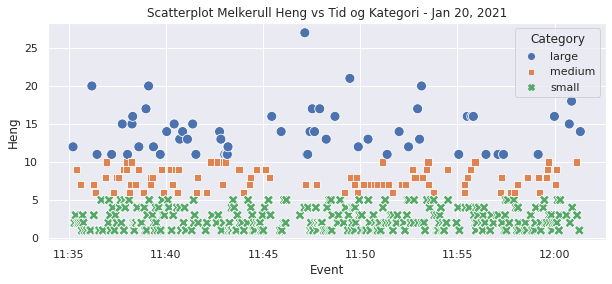

In [ ]:
#Scatterplot of the hanging pieces vs time and category
g4 = sns.scatterplot(data=df, x='Event', y='Heng', hue='Category', style='Category', s=100, hue_order=['large', 'medium', 'small'])
xformatter = mdates.DateFormatter("%H:%M")
g4.xaxis.set_major_formatter(xformatter)
plt.title('Scatterplot Melkerull Heng vs Tid og Kategori - Jan 20, 2021')
plt.show()

#Depositor Analysis

## Uploading necessary packages

In [ ]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (8, 4)})

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

Saving 2021-01-25-Melkerull_heng_ab.xlsx to 2021-01-25-Melkerull_heng_ab (1).xlsx


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df = pd.read_excel(io.BytesIO(uploaded['2021-01-25-Melkerull_heng_ab.xlsx']))

In [ ]:
#Checking stored dataframe
df = df.rename(columns={'Bit': 'Heng'})
df['Cat'] = df['Cat'].astype('category')
df.tail(2)

,Time,Cat,Heng
133,2021-01-25 12:43:01.458,Up_form,3.49
134,2021-01-25 12:43:07.951,Up_form,3.53


In [ ]:
#Checking the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    135 non-null    datetime64[ns]
 1   Cat     135 non-null    category      
 2   Heng    135 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [ ]:
#Dropping outliers
df = df[df['Heng'] < 3.70].reset_index(drop=True)
df.tail(2)

,Time,Cat,Heng
133,2021-01-25 12:43:01.458,Up_form,3.49
134,2021-01-25 12:43:07.951,Up_form,3.53


In [ ]:
#Performing statistical analysis of weight
df['Heng'].describe()

count    135.000000
mean       3.537704
std        0.043037
min        3.460000
25%        3.510000
50%        3.530000
75%        3.570000
max        3.650000
Name: Heng, dtype: float64

## EDA Bit Weight

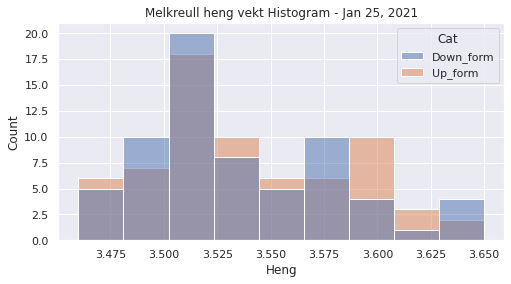

In [ ]:
#Plotting the histogram of the weights
sns.histplot(data=df, x='Heng', hue='Cat')
plt.title('Melkreull heng vekt Histogram - Jan 25, 2021')
plt.show()

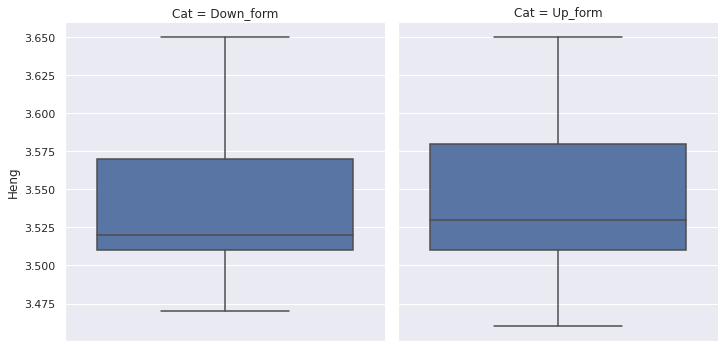

In [ ]:
#Plotting the Boxplot of the weights
sns.catplot(data=df, y='Heng', kind='box', col='Cat')
#plt.title('Melkerull heng vekt Boxplot - Jan 25, 2021')
plt.show()

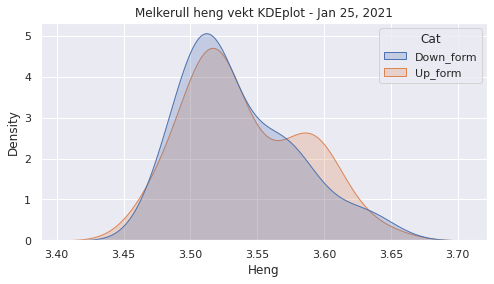

In [ ]:
#Plotting the KDEplot of the weights
sns.kdeplot(data=df, x='Heng', hue='Cat', shade=True)
plt.title('Melkerull heng vekt KDEplot - Jan 25, 2021')
plt.show()

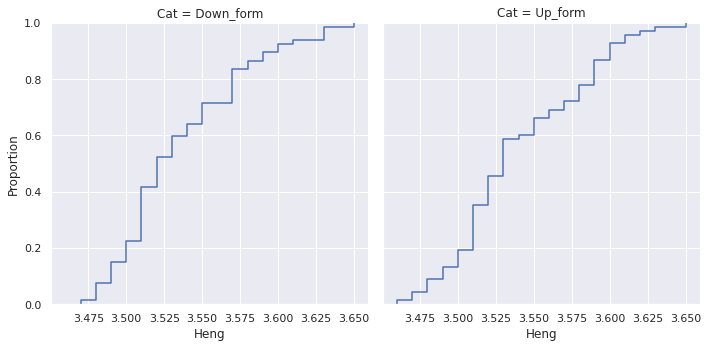

In [ ]:
#Plotting the cum distribution plot of the weights
sns.displot(data=df, x='Heng', kind='ecdf', col='Cat')
#plt.title('Cum Distribution Melkerull heng vekt - Jan 25, 2021')
plt.show()

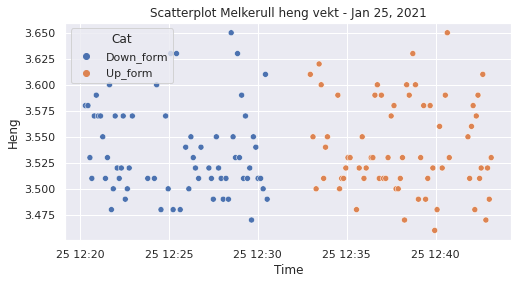

In [ ]:
#Plotting the scatter plot of weights against time
sns.scatterplot(data=df, x='Time', y='Heng', hue='Cat')
plt.title('Scatterplot Melkerull heng vekt - Jan 25, 2021')
plt.show()

## Depositor statistical tests

In [ ]:
#Importing statistical package
from scipy import stats

In [ ]:
#1-sample t-test: testing the value of the population mean
stats.ttest_1samp(a=df['Heng'], popmean=3.52)

Ttest_1sampResult(statistic=4.779614792837874, pvalue=4.553981326283824e-06)

With a pvalue of 4.554e-06, we can infer that the population mean for the sample is not 3.52 grams

In [ ]:
#2-sample t-test: testing for difference across populations
down_form = df[df['Cat'] == 'Down_form']['Heng']
up_form = df[df['Cat'] == 'Up_form']['Heng']
stats.ttest_ind(a=down_form, b=up_form)

Ttest_indResult(statistic=-0.5831202144454928, pvalue=0.5607998235157677)

With a pvalue of 0.56, we can infer that the population mean between the samples is similar

#Filling Analysis

## Importing necessary packages and data

In [ ]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (12, 5)})

In [96]:
#Uploading file from local drive
from google.colab import files
uploaded3 = files.upload()

Saving 2021-04-26_depositor_j4.csv to 2021-04-26_depositor_j4 (2).csv


In [97]:
#Storing dataset in a Pandas Dataframe
import io
df3 = pd.read_csv(io.BytesIO(uploaded3['2021-04-26_depositor_j4.csv']), parse_dates=['Time'], index_col='Time')

In [91]:
#Info
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        321 non-null    object 
 1   Dep_temp    321 non-null    float64
 2   %_filled    321 non-null    int64  
 3   Mold_temp   321 non-null    float64
 4   Line_speed  321 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 12.7+ KB


In [94]:
df3['Line_speed'].describe()

count    321.000000
mean      26.398442
std        0.176327
min       25.600000
25%       26.300000
50%       26.400000
75%       26.500000
max       26.900000
Name: Line_speed, dtype: float64

## Filling EDA

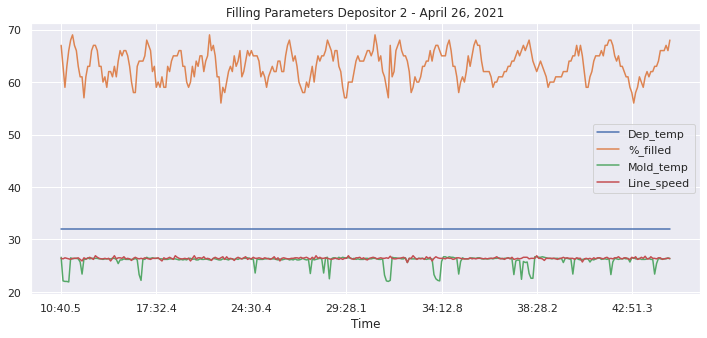

In [99]:
df3.plot()
plt.title('Filling Parameters Depositor 2 - April 26, 2021')
plt.show()

# Missing Molds

## Importing necessary packages and data

In [1]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (12, 5)})

In [3]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

Saving 2021-04-26_Missing_molds.csv to 2021-04-26_Missing_molds.csv


In [31]:
#Storing dataset in a Pandas Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['2021-04-26_Missing_molds.csv']), parse_dates=['Time'])

In [32]:
#Checking stored dataframe
df = df.rename(columns={'Num': 'Molds'})
df.tail(3)

,Time,Molds
90,2021-04-26 12:28:22.908,1
91,2021-04-26 12:30:31.575,1
92,2021-04-26 12:32:20.882,0


In [33]:
#Checking the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    93 non-null     datetime64[ns]
 1   Molds   93 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


## Missing molds EDA

In [34]:
#Creating a copy of the dataframe and counting categorical values
trial1 = df.copy()
trial1['Molds'].value_counts()

1    91
0     2
Name: Molds, dtype: int64

In [35]:
#Calculating the cumulative sum and GE Loss
trial1 = trial1.assign(Missing_molds = lambda x: x['Molds'].cumsum())
trial1 = trial1.assign(GE_loss = lambda y: (round(y['Missing_molds']/1154, 3))*100)
trial1.tail(3)

,Time,Molds,Missing_molds,GE_loss
90,2021-04-26 12:28:22.908,1,90,7.8
91,2021-04-26 12:30:31.575,1,91,7.9
92,2021-04-26 12:32:20.882,0,91,7.9


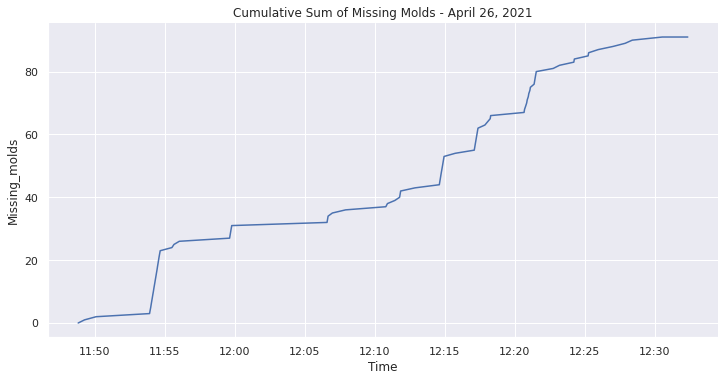

In [36]:
#Plotting the cumulative count of missing molds vs. time
g1 = sns.relplot(data=trial1, x='Time', y='Missing_molds', kind='line', aspect=2.0)
xformatter = mdates.DateFormatter("%H:%M")
g1.axes[0,0].xaxis.set_major_formatter(xformatter)
plt.title('Cumulative Sum of Missing Molds - April 26, 2021')
plt.show()

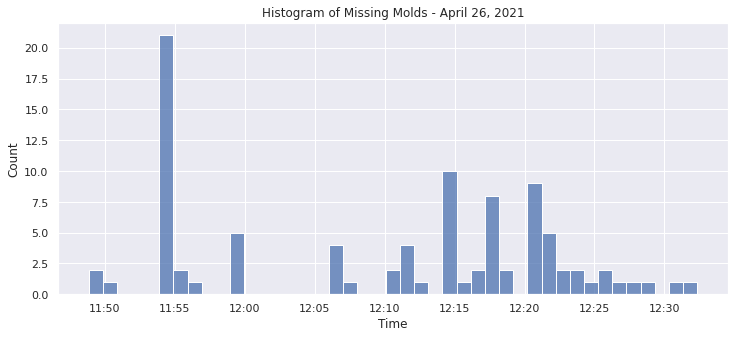

In [37]:
#Plotting a histogram of the missing forms vs. time
g2 = sns.histplot(data=trial1, x='Time', bins=43)
xformatter = mdates.DateFormatter("%H:%M")
g2.xaxis.set_major_formatter(xformatter)
plt.title('Histogram of Missing Molds - April 26, 2021')
plt.show()

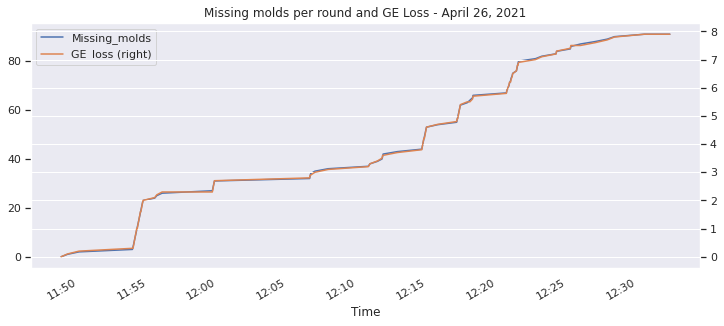

In [38]:
#Plotting the missing forms and GE Loss in secondary axis
ax = trial1.plot(x='Time', y='Missing_molds')
trial1.plot(x='Time', y='GE_loss', secondary_y=True, ax=ax)
xformatter = mdates.DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(xformatter)
plt.title("Missing molds per round and GE Loss - April 26, 2021")
plt.show()

In [44]:
#Time for a full cycle of the molding line
trial1['Time'].iloc[-1] - trial1['Time'].iloc[0]

Timedelta('0 days 00:43:31.692000')

#Mold crashes

## Uploading necessary packages

In [ ]:
#Importing necessary packages
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (12, 5)})

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

Saving 2021_jensen_4_krasjer.xlsx to 2021_jensen_4_krasjer.xlsx


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df = pd.read_excel(io.BytesIO(uploaded['2021_jensen_4_krasjer.xlsx']))

In [ ]:
#checking the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Event      87 non-null     datetime64[ns]
 1   Dato       87 non-null     datetime64[ns]
 2   Start      87 non-null     object        
 3   Avslutt    87 non-null     object        
 4   Min_tapt   87 non-null     float64       
 5   Skift      87 non-null     object        
 6   Operasjon  87 non-null     object        
 7   Produkt    87 non-null     object        
 8   Group      87 non-null     object        
 9   Dør        87 non-null     object        
 10  Full_tom   21 non-null     object        
 11  Tatt_ut    21 non-null     float64       
 12  Navn       87 non-null     object        
 13  Comment    4 non-null      object        
dtypes: datetime64[ns](2), float64(2), object(10)
memory usage: 9.6+ KB


In [ ]:
#Creating a copy of the dataframe and dropping columns with missing data
cr = df.copy()
cr.drop(columns=['Full_tom', 'Tatt_ut', 'Comment'], axis=1, inplace=True)
cr.head()

,Event,Dato,Start,Avslutt,Min_tapt,Skift,Operasjon,Produkt,Group,Dør,Navn
0,2020-01-02 18:00:00,2020-01-02,18:00:00,18:10:00,10.0,Kveld,Oppstart,Mjölkchoklad,Massive,2.14A,Øyvind
1,2020-01-02 23:49:00,2020-01-02,23:49:00,23:59:00,10.0,Natt,Drift,Mjölkchoklad,Massive,1.28A,Jørn
2,2020-01-06 05:45:00,2020-01-06,05:45:00,06:00:00,15.0,Dag,Oppstart,Melkerull,Massive,1.24A,Kim Rino
3,2020-01-06 06:10:00,2020-01-06,06:10:00,06:35:00,25.0,Dag,Oppstart,Melkerull,Massive,2.14A,Kim Rino
4,2020-01-06 15:20:00,2020-01-06,15:20:00,16:00:00,40.0,Kveld,Drift,Melkerull,Massive,2.1A,Øyvind


In [ ]:
#Customizing the time to categorical for easy groupying
cr = cr.assign(Timer = cr['Event'].dt.hour)
cr = cr.assign(Måned = cr['Event'].dt.month)
cr = cr.assign(År = cr['Event'].dt.year)
cr.tail()

,Event,Dato,Start,Avslutt,Min_tapt,Skift,Operasjon,Produkt,Group,Dør,Navn,Timer,Måned,År
82,2021-02-25 01:15:00,2021-02-25,01:15:00,04:00:00,165.0,Natt,Oppstart,Daim_rull,Ingredienser,1.20A,Jørn,1,2,2021
83,2021-03-01 05:45:00,2021-03-01,05:45:00,06:00:00,15.0,Dag,Oppstart,Milkroll,Massive,1.29A,Kim Rino,5,3,2021
84,2021-03-12 07:30:00,2021-03-12,07:30:00,07:40:00,10.0,Dag,Drift,Mintchoko,Fylte,2.8A,Kim Rino,7,3,2021
85,2021-03-17 12:45:00,2021-03-17,12:45:00,13:45:00,60.0,Dag,Omlegg,Daim_rull,Ingredienser,1.20A,Kim Rino,12,3,2021
86,2021-03-19 15:40:00,2021-03-19,15:40:00,17:10:00,90.0,Kveld,Avslutt,Krokanrull,Massive,1.00A,Øyvind,15,3,2021


## Crashes EDA

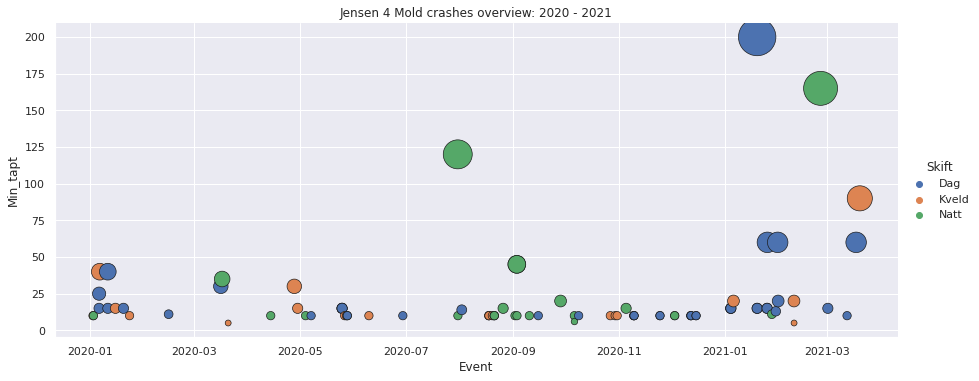

In [ ]:
#Plotting the minutes and crashes against time
sns.relplot(x='Event', y='Min_tapt', data=cr, hue='Skift', hue_order=['Dag', 'Kveld', 'Natt'], height=5, aspect=2.5, s=cr.Min_tapt*7, linewidths=1, edgecolors='k', figsize=(12,9))
plt.title('Jensen 4 Mold crashes overview: 2020 - 2021')
plt.show()

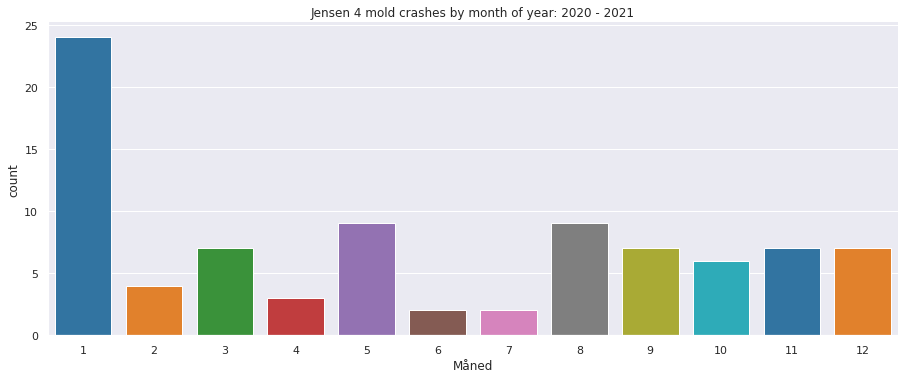

In [ ]:
#Plotting the relationship between crashes and year of the month
sns.catplot(x='Måned', data=cr, kind='count', height=5.0, aspect=2.5, palette='tab10')
plt.title('Jensen 4 mold crashes by month of year: 2020 - 2021')
plt.show()

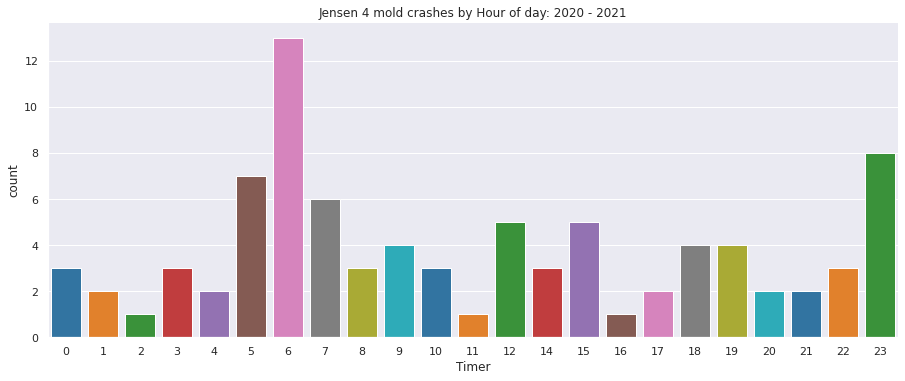

In [ ]:
#Plotting the relationship between hours of day and mold crashes
sns.catplot(x='Timer', data=cr, kind='count', height=5.0, aspect=2.5, palette='tab10')
plt.title('Jensen 4 mold crashes by Hour of day: 2020 - 2021')
plt.show()

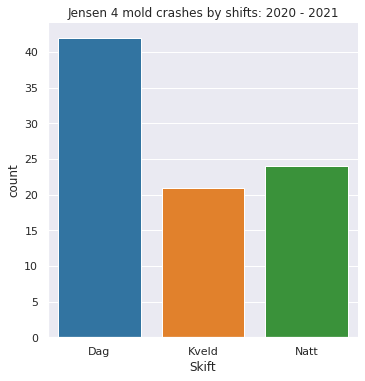

In [ ]:
#Plotting the relationship between shifts and mold crashes
sns.catplot(x='Skift', data=cr, kind='count', order=['Dag', 'Kveld', 'Natt'], height=5.0, aspect=1.0, palette='tab10')
plt.title('Jensen 4 mold crashes by shifts: 2020 - 2021')
plt.show()

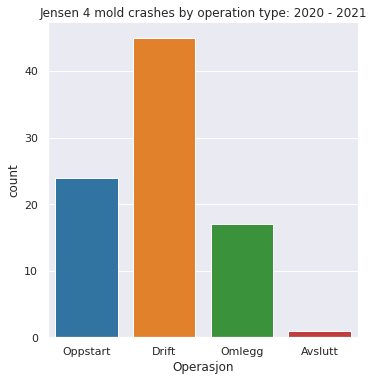

In [ ]:
#Plotting the relationship between operation type and mold crashes
sns.catplot(x='Operasjon', data=cr, kind='count', height=5.0, aspect=1.0, palette='tab10')
plt.title('Jensen 4 mold crashes by operation type: 2020 - 2021')
plt.show()

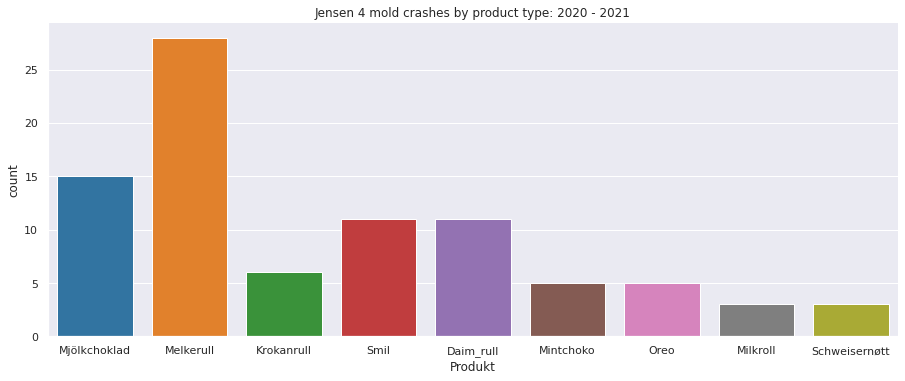

In [ ]:
#Plotting the relationship between product type and mold crashes
sns.catplot(x='Produkt', data=cr, kind='count', height=5.0, aspect=2.5, palette='tab10')
plt.title('Jensen 4 mold crashes by product type: 2020 - 2021')
plt.show()

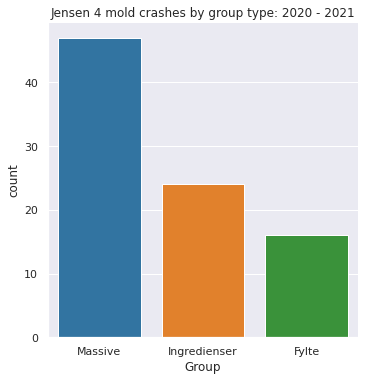

In [ ]:
#Plotting the relationship between group type and mold crashes
sns.catplot(x='Group', data=cr, kind='count', height=5.0, aspect=1.0, palette='tab10')
plt.title('Jensen 4 mold crashes by group type: 2020 - 2021')
plt.show()

In [ ]:
#Aggregating the door count by highest to lowest 
door = cr[['Dør', 'Event']].copy()
door = door.groupby('Dør').count().sort_values(by='Event', ascending=False).reset_index()
door.head()

,Dør,Event
0,1.29A,15
1,1.20A,10
2,1.28A,9
3,1.22A,8
4,2.3A,8


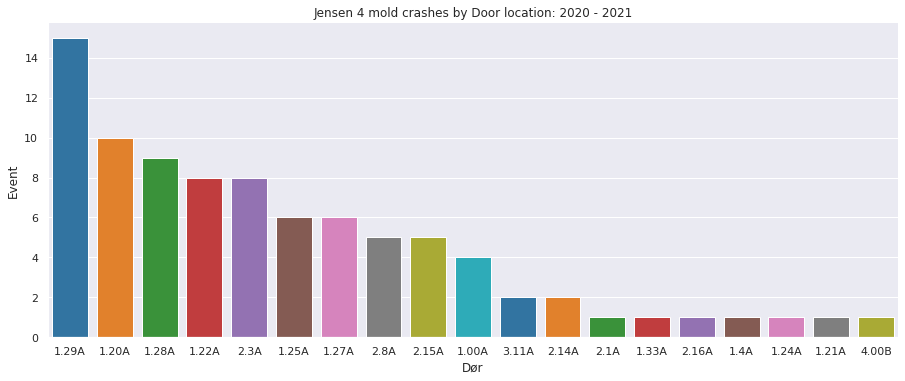

In [ ]:
#Plotting the relationship between group type and mold crashes
sns.catplot(x='Dør', y='Event', data=door, kind='bar', height=5.0, aspect=2.5, palette='tab10')
plt.title('Jensen 4 mold crashes by Door location: 2020 - 2021')
plt.show()

#Molding temperatures Analysis

## Uploading necessary packages

In [ ]:
#Importing necessary packages
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (12, 5)})

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

Saving pkksj4_2021.xlsx to pkksj4_2021 (2).xlsx


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df = pd.read_excel(io.BytesIO(uploaded['pkksj4_2021.xlsx']))

In [ ]:
df.head(2)

,Date,Time,Event,Weeknum,Weekday,Shift,State,Mass,Group,Product,Format,Trinn_7,Trinn_6,Trinn_5,Trinn_2,Trinn_1,Formvarmer,Kjølevann,Formhastighet,Skall_1,Skall_2,Kjøle_3,Kjøle_4,Kjøle_5,Kjøle_6,Kjøle_7,T_Karamell,Comment
0,2021-01-01,00:00:00,2021-01-01 00:00:00,1,Friday,Night,No_Shift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-01,01:00:00,2021-01-01 01:00:00,1,Friday,Night,No_Shift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           624 non-null    datetime64[ns]
 1   Time           744 non-null    object        
 2   Event          744 non-null    object        
 3   Weeknum        744 non-null    int64         
 4   Weekday        744 non-null    object        
 5   Shift          744 non-null    object        
 6   State          607 non-null    object        
 7   Mass           358 non-null    object        
 8   Group          358 non-null    object        
 9   Product        358 non-null    object        
 10  Format         358 non-null    object        
 11  Trinn_7        279 non-null    float64       
 12  Trinn_6        279 non-null    float64       
 13  Trinn_5        279 non-null    float64       
 14  Trinn_2        54 non-null     float64       
 15  Trinn_1        54 non-n

## Temperatures EDA

In [ ]:
#Creating a dataframe for the tempering data
cols = ['Trinn_2', 'Trinn_1', 'Formhastighet', 'Skall_1', 'Kjøle_3', 'T_Karamell', 'Comment']
df = df.drop(columns=cols, axis=1)
df = df[df['State'] == 'Operating'].reset_index(drop=True)
df.tail(3)

,Date,Time,Event,Weeknum,Weekday,Shift,State,Mass,Group,Product,Format,Trinn_7,Trinn_6,Trinn_5,Formvarmer,Kjølevann,Skall_2,Kjøle_4,Kjøle_5,Kjøle_6,Kjøle_7
276,2021-01-26,04:00:00,2021-01-26 04:00:00,5,Tuesday,Night,Operating,Svensk,Ingredienser,Daim_roll,2pk,29.4,27.2,27.5,34.9,12.4,33.9,5.8,9.6,6.4,8.1
277,2021-01-26,05:00:00,2021-01-26 05:00:00,5,Tuesday,Night,Operating,Svensk,Ingredienser,Daim_roll,2pk,28.4,26.8,27.4,34.4,13.4,33.9,7.1,10.2,6.0,8.2
278,2021-01-26,06:00:00,2021-01-26 06:00:00,5,Tuesday,Night,Operating,Svensk,Ingredienser,Daim_roll,2pk,29.1,27.1,27.5,34.8,12.9,34.3,6.0,9.5,6.5,8.1


In [ ]:
#Converting Event column to datetime and Weeknum to category dtype
df['Event'] = pd.to_datetime(df['Event'])
df['Weeknum'] = df['Weeknum'].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        279 non-null    datetime64[ns]
 1   Time        279 non-null    object        
 2   Event       279 non-null    datetime64[ns]
 3   Weeknum     279 non-null    category      
 4   Weekday     279 non-null    object        
 5   Shift       279 non-null    object        
 6   State       279 non-null    object        
 7   Mass        279 non-null    object        
 8   Group       279 non-null    object        
 9   Product     279 non-null    object        
 10  Format      279 non-null    object        
 11  Trinn_7     279 non-null    float64       
 12  Trinn_6     279 non-null    float64       
 13  Trinn_5     279 non-null    float64       
 14  Formvarmer  279 non-null    float64       
 15  Kjølevann   279 non-null    float64       
 16  Skall_2     279 non-null  

## Warm Zone EDA

In [ ]:
#Slicing dataframe to work with warm temperatures
temp = df[['Event', 'Formvarmer', 'Trinn_5', 'Trinn_6', 'Trinn_7']]
temp.tail(3)

,Event,Formvarmer,Trinn_5,Trinn_6,Trinn_7
276,2021-01-26 04:00:00,34.9,27.5,27.2,29.4
277,2021-01-26 05:00:00,34.4,27.4,26.8,28.4
278,2021-01-26 06:00:00,34.8,27.5,27.1,29.1


In [ ]:
#Computing the statistical analysis of the warm zone
temp.describe()

,Formvarmer,Trinn_5,Trinn_6,Trinn_7
count,279.000000,279.000000,279.000000,279.000000
mean,34.180287,28.385663,27.528315,28.862007
std,0.878114,0.700675,0.572217,0.685138
min,30.700000,26.600000,26.100000,27.700000
25%,33.700000,27.900000,27.100000,28.400000
50%,34.300000,28.200000,27.400000,28.600000
75%,34.800000,28.850000,28.000000,29.400000
max,35.900000,30.100000,29.100000,30.800000


In [ ]:
#Melting the dataframe into 1 identifier and 1 temperature column
temp = pd.melt(temp, id_vars='Event', var_name='Warm_zone', value_name='Temp', ignore_index=True)
temp.tail()

,Event,Warm_zone,Temp
1111,2021-01-26 02:00:00,Trinn_7,28.8
1112,2021-01-26 03:00:00,Trinn_7,28.4
1113,2021-01-26 04:00:00,Trinn_7,29.4
1114,2021-01-26 05:00:00,Trinn_7,28.4
1115,2021-01-26 06:00:00,Trinn_7,29.1


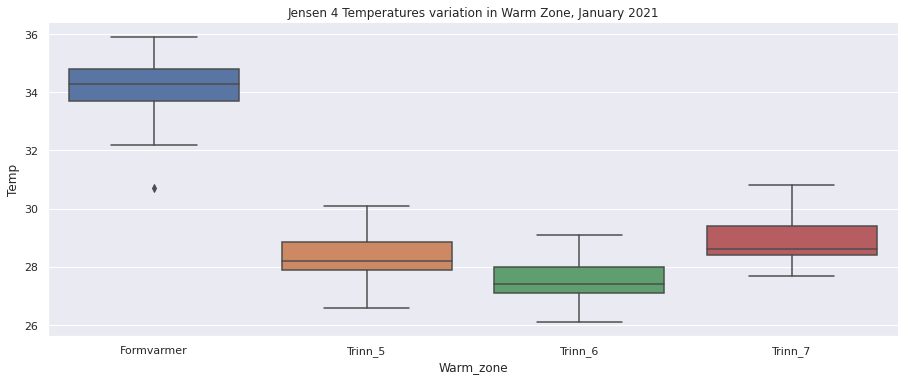

In [ ]:
#Plotting the warm zone temperatures variation
sns.catplot(data=temp, x='Warm_zone', y='Temp', kind='box', aspect=2.5 )
plt.title('Jensen 4 Temperatures variation in Warm Zone, January 2021')
plt.show()

In [ ]:
#Grouping by Warm zone and calculating the mean 
temp[['Warm_zone', 'Temp']].groupby(by='Warm_zone').mean()

,Temp
Warm_zone,
Formvarmer,34.180287
Trinn_5,28.385663
Trinn_6,27.528315
Trinn_7,28.862007


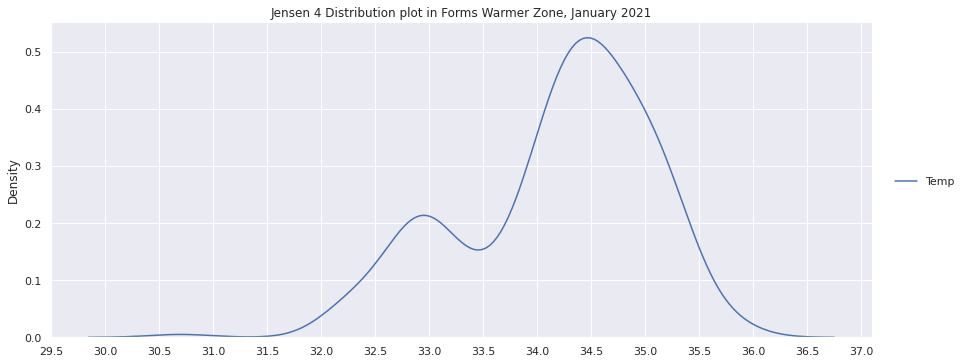

In [ ]:
#Distribution plot of forms warmer zone
sns.displot(data=temp[temp['Warm_zone'] == 'Formvarmer'], kind='kde', aspect=2.5)
plt.title('Jensen 4 Distribution plot in Forms Warmer Zone, January 2021')
plt.xticks(np.arange(29.5, 37.5, step=0.5))
plt.show()

## Cooling Zone EDA

In [ ]:
#Slicing dataframe to work with cooling temperatures
cool = df[['Event', 'Kjølevann', 'Kjøle_7', 'Kjøle_4', 'Kjøle_5', 'Kjøle_6']]
cool.tail()

,Event,Kjølevann,Kjøle_7,Kjøle_4,Kjøle_5,Kjøle_6
274,2021-01-26 02:00:00,12.7,8.2,5.8,9.5,6.6
275,2021-01-26 03:00:00,11.6,8.0,6.0,9.5,5.5
276,2021-01-26 04:00:00,12.4,8.1,5.8,9.6,6.4
277,2021-01-26 05:00:00,13.4,8.2,7.1,10.2,6.0
278,2021-01-26 06:00:00,12.9,8.1,6.0,9.5,6.5


In [ ]:
#Computing the statistical analysis of the cooling zone
cool.describe()

,Kjølevann,Kjøle_7,Kjøle_4,Kjøle_5,Kjøle_6
count,279.000000,279.000000,279.000000,279.000000,279.000000
mean,12.086738,7.860215,6.673799,9.118495,7.850538
std,0.462636,0.514217,0.534267,0.834116,0.624838
min,10.400000,6.300000,5.800000,6.900000,5.500000
25%,11.900000,7.700000,6.100000,9.300000,7.500000
50%,12.000000,7.900000,6.900000,9.500000,7.900000
75%,12.250000,8.100000,7.100000,9.600000,8.400000
max,13.500000,10.500000,7.900000,10.300000,8.800000


In [ ]:
#Melting the dataframe into 1 identifier and 1 temperature column
cool = pd.melt(cool, id_vars='Event', var_name='Cool_zone', value_name='Temp', ignore_index=True)
cool.tail()

,Event,Cool_zone,Temp
1390,2021-01-26 02:00:00,Kjøle_6,6.6
1391,2021-01-26 03:00:00,Kjøle_6,5.5
1392,2021-01-26 04:00:00,Kjøle_6,6.4
1393,2021-01-26 05:00:00,Kjøle_6,6.0
1394,2021-01-26 06:00:00,Kjøle_6,6.5


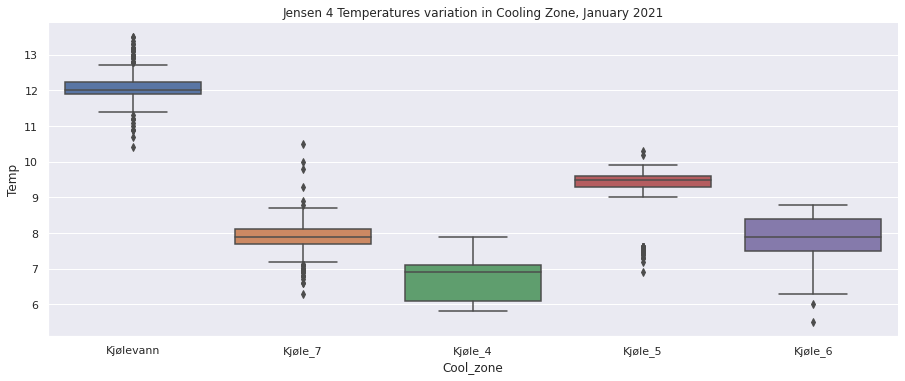

In [ ]:
#Plotting the cooling zone temperatures variation
sns.catplot(data=cool, x='Cool_zone', y='Temp', kind='box', aspect=2.5 )
plt.title('Jensen 4 Temperatures variation in Cooling Zone, January 2021')
plt.show()

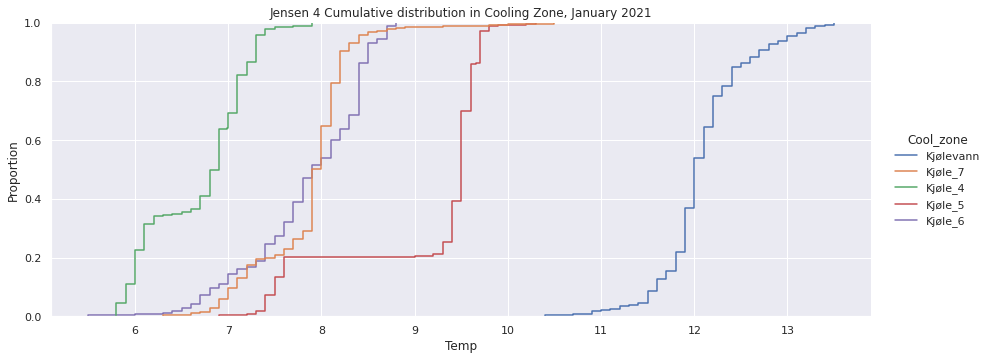

In [ ]:
#Distribution plot of cooling zone
sns.displot(data=cool, x='Temp', hue='Cool_zone', kind='ecdf', aspect=2.5)
plt.title('Jensen 4 Cumulative distribution in Cooling Zone, January 2021')
plt.show()

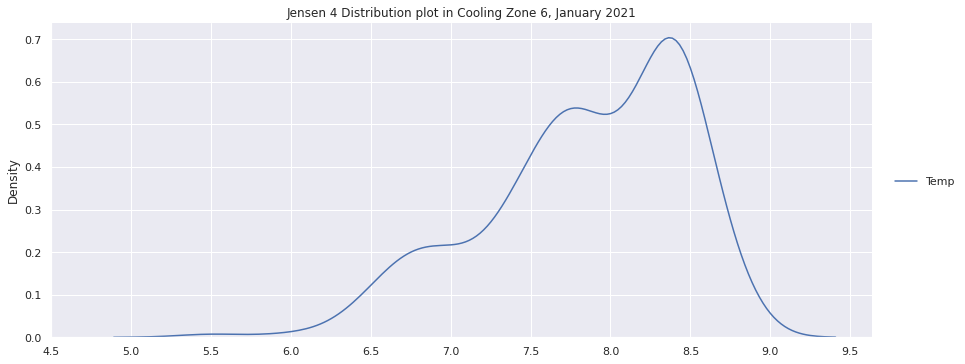

In [ ]:
#Distribution plot of cooling zone 6
sns.displot(data=cool[cool['Cool_zone'] == 'Kjøle_6'], kind='kde', aspect=2.5)
plt.title('Jensen 4 Distribution plot in Cooling Zone 6, January 2021')
plt.xticks(np.arange(4.5, 10.0, step=0.5))
plt.show()

# Chocolate weight historical analysis

## Uploading necessary packages

In [ ]:
#Importing necessary packages
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#Customizing data visualization styles for Seaborn
#sns.set_theme(rc = {'figure.figsize': (20, 5)})

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

Saving vektkontroll_QSTEST_07.12.2020.xlsx to vektkontroll_QSTEST_07.12.2020.xlsx


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df = pd.read_excel(io.BytesIO(uploaded['vektkontroll_QSTEST_07.12.2020.xlsx']))

In [ ]:
#Check the header of the dataframe
df.head(2)

,Part,Process,Shift,Employee,Lotkode_produkt,Best_før_dato,Date,Time,Gross_Weight,Fixed_Tare,Actual_Weight,Average_Weight,Shift_Average_Weight,Comment
0,00323349-Milkroll-IkeaCL3,J4-støpeanlegg,Dag,"Ruud, Kim Rino",OGO0405011,2021-10-08,2020-12-07,11:49:06,153.19,5.5,147.69,148.058,148.5389,NaN
1,00323349-Milkroll-IkeaCL3,J4-støpeanlegg,Dag,"Ruud, Kim Rino",OGO0405011,2021-10-08,2020-12-07,11:49:06,153.63,5.5,148.13,NaN,NaN,NaN


## Chocolate weights EDA

In [ ]:
#Creating a pandas dataframe for the gross weight and product types
weights = df[['Part', 'Employee', 'Date', 'Time', 'Actual_Weight', 'Fixed_Tare', 'Gross_Weight']]
weights.tail(2)

,Part,Employee,Date,Time,Actual_Weight,Fixed_Tare,Gross_Weight
6079,00323346-Milkroll-IkeaCL1,"Vesteras, Kevin",2020-06-18,12:23:20,143.75,5.5,149.25
6080,00323346-Milkroll-IkeaCL1,"Vesteras, Kevin",2020-06-18,12:23:20,143.31,5.5,148.81


In [ ]:
#Assigning a new column to divide current time in hour slots
weights = weights.assign(Hours = lambda x: x['Time'].astype(str).str[:2])
weights.tail()

,Part,Employee,Date,Time,Actual_Weight,Fixed_Tare,Gross_Weight,Hours
6076,00323346-Milkroll-IkeaCL1,"Vesteras, Kevin",2020-06-18,12:23:20,143.46,5.5,148.96,12
6077,00323346-Milkroll-IkeaCL1,"Vesteras, Kevin",2020-06-18,12:23:20,143.81,5.5,149.31,12
6078,00323346-Milkroll-IkeaCL1,"Vesteras, Kevin",2020-06-18,12:23:20,143.58,5.5,149.08,12
6079,00323346-Milkroll-IkeaCL1,"Vesteras, Kevin",2020-06-18,12:23:20,143.75,5.5,149.25,12
6080,00323346-Milkroll-IkeaCL1,"Vesteras, Kevin",2020-06-18,12:23:20,143.31,5.5,148.81,12


In [ ]:
#Checking the datatypes for the dataframe after operations
weights.dtypes

Part                     object
Employee                 object
Date             datetime64[ns]
Time                     object
Actual_Weight           float64
Fixed_Tare              float64
Gross_Weight            float64
Hours                    object
dtype: object

In [ ]:
#Counting the number of unique values for the Hours
weights.Hours.sort_values().unique()

array(['03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13',
       '14', '15'], dtype=object)

In [ ]:
#Getting the number of measurements performed for each hour
weights.groupby(['Hours'])['Hours'].count()

Hours
03     20
04     20
05     20
06     20
07    800
08    800
09    790
10    700
11    740
12    854
13    788
14    509
15     20
Name: Hours, dtype: int64

In [ ]:
#Getting the average weight of each product
weights.groupby(['Part']).mean()

,Actual_Weight,Fixed_Tare,Gross_Weight
Part,,,
00013552-smilmintMarab78g,78.919717,2.2,81.119717
00018207-sveitsnøttrul67g,67.735267,2.2,69.935267
00018452-melkerull74g,74.372508,2.2,76.572508
00018462-smil78g,79.236825,2.2,81.436825
00027458-krokanrull71g,71.453357,2.2,73.653357
00032135-mjölkchoMarab74g,74.339313,2.2,76.539313
00078604-melkerullx2-148g,148.752000,5.5,154.252000
00078606-smilx2-156g,158.108800,5.5,163.608800
00323346-Milkroll-IkeaCL1,148.615710,5.5,154.115710


In [ ]:
#Statistical analysis of products weights
weights.groupby(['Part'])['Actual_Weight', 'Gross_Weight'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Actual_Weight              ... Gross_Weight        
                                  count        mean  ...          75%     max
Part                                                 ...                     
00013552-smilmintMarab78g         389.0   78.919717  ...      81.4400   82.33
00018207-sveitsnøttrul67g         150.0   67.735267  ...      70.2225   70.92
00018452-melkerull74g             937.0   74.372508  ...      76.7300   80.05
00018462-smil78g                  630.0   79.236825  ...      81.6200   82.32
00027458-krokanrull71g            140.0   71.453357  ...      73.9125   74.81
00032135-mjölkchoMarab74g         830.0   74.339313  ...      76.7300   77.39
00078604-melkerullx2-148g          30.0  148.752000  ...     154.4475  154.71
00078606-smilx2-156g               50.0  158.108800  ...     164.5400  166.25
00323346-Milkroll-IkeaCL1         575.0  148.615710  ...     154.6800  155.68
00323347-Milkroll-IkeaCL2         320.0  148.725313  ...     154.4900  155.31
00323349-Milkroll-IkeaCL3         190.0  148.773263  ...     154.6900  155.35
00324091-daimrullIKEACL2          780.0  134.911641  ...     140.9800  143.04
00324093-daimrullIKEACL1          180.0  134.368611  ...     140.3100  142.19
00324096-daimrullIKEACL3          300.0  134.583733  ...     140.5600  142.26
00587326-daimrullMarab67g         110.0   67.499727  ...      70.0000   73.28
00677018-Milkroll-IkeaUS          110.0  148.219364  ...     154.1750  154.79
04021725-smilMarab78gDK           100.0   79.195600  ...      81.5325   82.81
04248867-oreoMarabou67g            60.0   67.356333  ...      69.8950   70.97
04253415-daimroll-IKEAUS          200.0  134.844300  ...     140.8525  142.68

[19 rows x 16 columns]

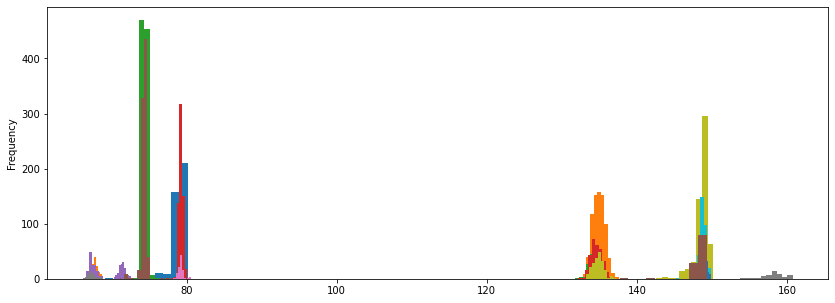

In [ ]:
weights.groupby(['Part'])['Actual_Weight'].plot(kind = 'hist', figsize = (14, 5), label = 'Part')
plt.show()

#Weight by shift analysis

## Uploading necessary packages

In [ ]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (8, 4)})

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

Saving oreo_weights_2021.xlsx to oreo_weights_2021.xlsx


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df = pd.read_excel(io.BytesIO(uploaded['oreo_weights_2021.xlsx']))

In [ ]:
#Checking stored dataframe
df.tail(2)

,Date,Shift,Sample_roll,Machine,Grams
334,2021-01-14,Natt,16,PKM3,3.13
335,2021-01-14,Natt,16,PKM3,3.19


In [ ]:
#Checking dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         336 non-null    datetime64[ns]
 1   Shift        336 non-null    object        
 2   Sample_roll  336 non-null    int64         
 3   Machine      336 non-null    object        
 4   Grams        336 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 13.2+ KB


In [ ]:
#Performing basic statistical analysis of the data
df['Grams'].describe()

count    336.000000
mean       3.275476
std        0.096743
min        3.040000
25%        3.210000
50%        3.280000
75%        3.340000
max        3.800000
Name: Grams, dtype: float64

## EDA Oreo Weight

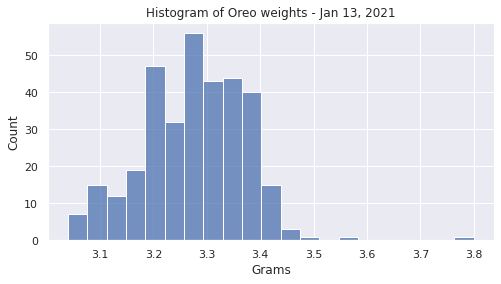

In [ ]:
#Plotting the histogram of the oreo weights
sns.histplot(data=df['Grams'])
plt.title('Histogram of Oreo weights - Jan 13, 2021')
plt.show()

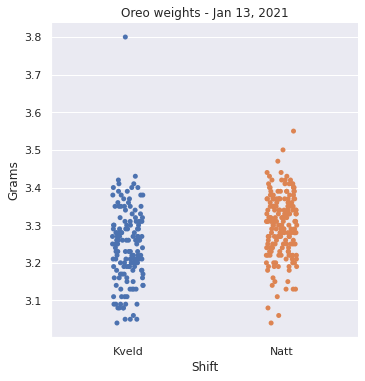

In [ ]:
#Plotting the strip plot of the oreo weights
sns.catplot(data=df, x='Shift', y='Grams')
plt.title('Oreo weights - Jan 13, 2021')
plt.show()

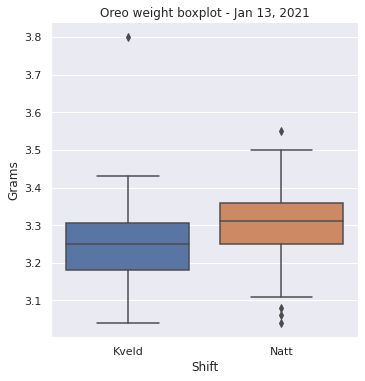

In [ ]:
#Plotting the Boxplot of the oreo weights
sns.catplot(data=df, x='Shift', y='Grams', kind='box')
plt.title('Oreo weight boxplot - Jan 13, 2021')
plt.show()

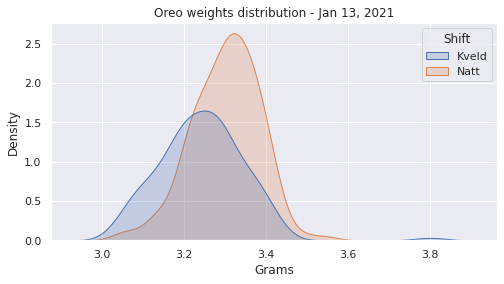

In [ ]:
#Plotting the Kdeplot of the oreo weights
sns.kdeplot(data=df, x='Grams', hue='Shift', shade=True)
plt.title('Oreo weights distribution - Jan 13, 2021')
plt.show()

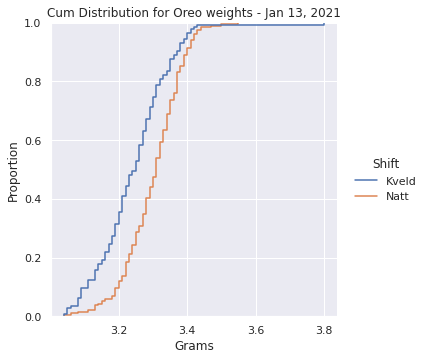

In [ ]:
#Plotting the cum distribution plot of the oreo weights
sns.displot(data=df, x='Grams', kind='ecdf', hue='Shift')
plt.title('Cum Distribution for Oreo weights - Jan 13, 2021')
plt.show()

In [ ]:
#Grouping and computing the mean value by shift and roll
oreo_mean = df.groupby(by=['Shift', 'Sample_roll']).mean().reset_index()
oreo_mean

,Shift,Sample_roll,Grams
0,Kveld,1,3.246190
1,Kveld,2,3.274286
2,Kveld,6,3.265714
3,Kveld,8,3.217619
4,Kveld,10,3.233333
5,Kveld,11,3.203810
6,Kveld,14,3.258095
7,Natt,3,3.344762
8,Natt,4,3.317143
9,Natt,5,3.302857


In [ ]:
#Grouping and computing the sum of each roll and shift
oreo_sum = df.groupby(by=['Shift', 'Sample_roll']).sum().reset_index()
oreo_sum

,Shift,Sample_roll,Grams
0,Kveld,1,68.17
1,Kveld,2,68.76
2,Kveld,6,68.58
3,Kveld,8,67.57
4,Kveld,10,67.90
5,Kveld,11,67.28
6,Kveld,14,68.42
7,Natt,3,70.24
8,Natt,4,69.66
9,Natt,5,69.36


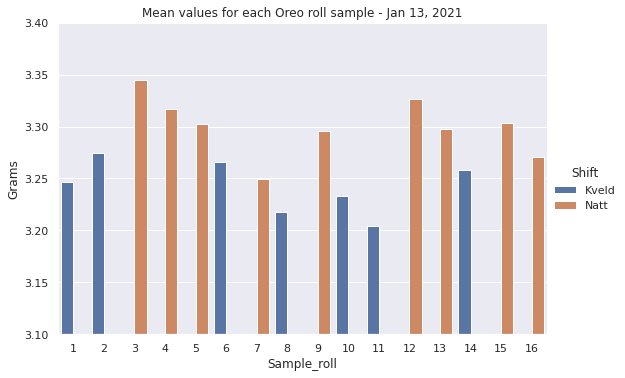

In [ ]:
#Plotting the mean values for each roll
sns.catplot(data=oreo_mean, x='Sample_roll', y='Grams', kind='bar', hue='Shift', aspect=1.5)
plt.title('Mean values for each Oreo roll sample - Jan 13, 2021')
plt.ylim(3.10, 3.4)
plt.show()

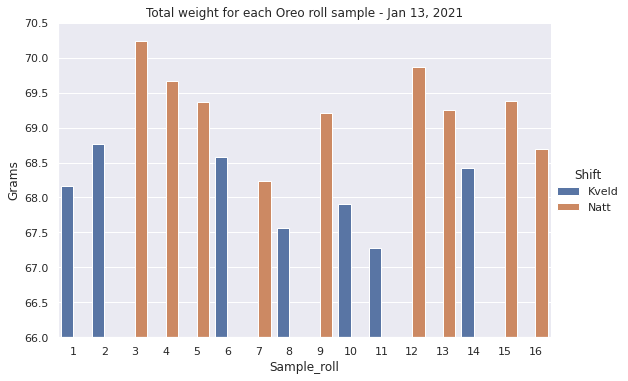

In [ ]:
#Plotting the mean values for each roll
sns.catplot(data=oreo_sum, x='Sample_roll', y='Grams', kind='bar', hue='Shift', aspect=1.5)
plt.title('Total weight for each Oreo roll sample - Jan 13, 2021')
plt.ylim(66.00, 70.5)
plt.show()

## Statistical tests

In [ ]:
#Importing statistical package
from scipy import stats

In [ ]:
#1-sample t-test: testing the value of the population mean
stats.ttest_1samp(a=df['Grams'], popmean=3.19)

Ttest_1sampResult(statistic=16.195561147847144, pvalue=5.615434596274428e-44)

With a pvalue of 5.61e-44, we can infer that the population mean for oreo is not 3.19 grams

In [ ]:
#2-sample t-test: testing for difference across populations
afternoon = df[df['Shift'] == 'Kveld']['Grams']
night = df[df['Shift'] == 'Natt']['Grams']
stats.ttest_ind(a=afternoon, b=night)

Ttest_indResult(statistic=-5.727315280019941, pvalue=2.2764247210841586e-08)

With a pvalue of 2.27e-08, we can infer that the population mean between afternoon and night shift are different.

# Single product weight analysis

## Uploading necessary packages

In [ ]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#Customizing data visualization styles
sns.set_theme(rc = {'figure.figsize': (8, 4)})

In [ ]:
#Uploading file from local drive
from google.colab import files
uploaded = files.upload()

Saving 2021-01-25_Melkerull_weight.csv to 2021-01-25_Melkerull_weight (1).csv


In [ ]:
#Storing dataset in a Pandas Dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['2021-01-25_Melkerull_weight.csv']), parse_dates=['Time'])

In [ ]:
#Checking stored dataframe
df = df.rename(columns={'Num': 'Heng'})
df.tail(2)

,Time,Heng
107,2021-01-25 11:02:11.199,3.57
108,2021-01-25 11:02:18.256,3.55


In [ ]:
#Checking the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    109 non-null    datetime64[ns]
 1   Heng    109 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [ ]:
#Dropping outliers
df = df[df['Heng'] < 3.70].reset_index(drop=True)
df.tail(2)

,Time,Heng
102,2021-01-25 11:02:11.199,3.57
103,2021-01-25 11:02:18.256,3.55


In [ ]:
#Performing statistical analysis of weight
df['Heng'].describe()

count    104.000000
mean       3.550000
std        0.046342
min        3.430000
25%        3.520000
50%        3.550000
75%        3.580000
max        3.660000
Name: Heng, dtype: float64

## Single chocolate weight EDA

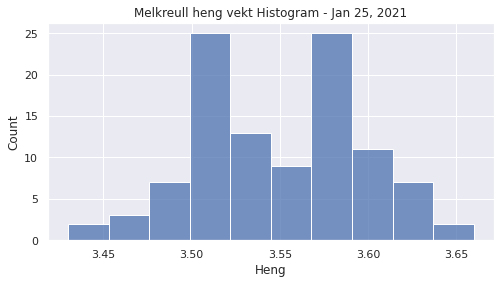

In [ ]:
#Plotting the histogram of the weights
sns.histplot(data=df['Heng'])
plt.title('Melkreull heng vekt Histogram - Jan 25, 2021')
plt.show()

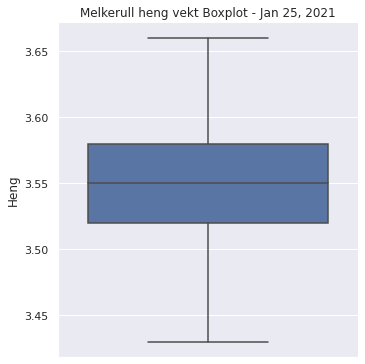

In [ ]:
#Plotting the Boxplot of the weights
sns.catplot(data=df, y='Heng', kind='box')
plt.title('Melkerull heng vekt Boxplot - Jan 25, 2021')
plt.show()

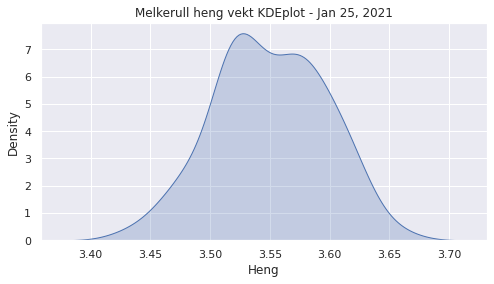

In [ ]:
#Plotting the KDEplot of the weights
sns.kdeplot(data=df, x='Heng', shade=True)
plt.title('Melkerull heng vekt KDEplot - Jan 25, 2021')
plt.show()

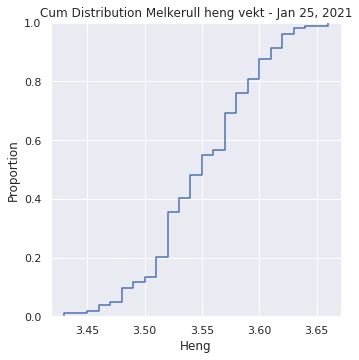

In [ ]:
#Plotting the cum distribution plot of the weights
sns.displot(data=df, x='Heng', kind='ecdf')
plt.title('Cum Distribution Melkerull heng vekt - Jan 25, 2021')
plt.show()

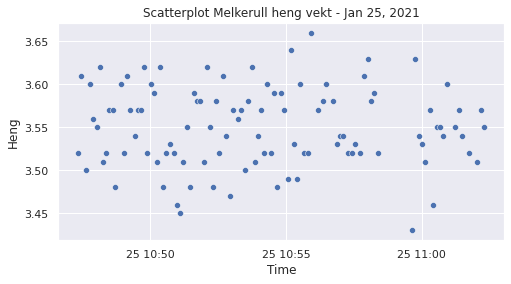

In [ ]:
#Plotting the scatter plot of weights against time
sns.scatterplot(data=df, x='Time', y='Heng')
plt.title('Scatterplot Melkerull heng vekt - Jan 25, 2021')
plt.show()